In [28]:
import tensorflow as tf
import pandas as pd
import math


tf.random.set_seed(42)
filename = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v1/myData/SensorData56.csv'
TofData = pd.read_csv(filename)

In [29]:
TofData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedB         646 non-null    int64  
 1   MedT         646 non-null    int64  
 2   MinB         646 non-null    int64  
 3   MinT         646 non-null    int64  
 4   MaxB         646 non-null    int64  
 5   MaxT         646 non-null    int64  
 6   MeanB        646 non-null    int64  
 7   MeanT        646 non-null    int64  
 8   Target       646 non-null    int64  
 9   MeanB-T      646 non-null    int64  
 10  MeanT-T      646 non-null    int64  
 11  MeanB(cali)  646 non-null    float64
 12  MeanT(cali)  646 non-null    float64
dtypes: float64(2), int64(11)
memory usage: 65.7 KB


In [32]:
TofData.tail()

,MedB,MedT,MinB,MinT,MaxB,MaxT,MeanB,MeanT,Target,MeanB-T,MeanT-T,MeanB(cali),MeanT(cali)
641,87,93,86,92,88,94,87,93,65,22,28,64.696594,65.831269
642,87,94,86,92,88,94,87,93,65,22,28,64.696594,65.831269
643,87,94,85,93,88,95,86,94,65,21,29,63.696594,66.831269
644,87,94,85,94,88,95,86,94,65,21,29,63.696594,66.831269
645,87,94,85,93,87,95,86,94,65,21,29,63.696594,66.831269


In [40]:
# 표준편차를 저장할 빈 리스트 생성
stds = []

# 참조값이 20부터 65까지 반복문 실행
for ref_value in range(20, 70, 5):
    # 참조값이 ref_value인 행만 필터링
    filtered_df = TofData[TofData['Target'] == ref_value]
    
    # 측정값의 표준편차 계산
    std = math.sqrt(filtered_df['MedB'].var())
    
    # 표준편차를 리스트에 추가
    stds.append(std)

# 결과 출력
print("표준편차")
for i, std in enumerate(stds):
    ref_value = 20 + i * 5
    print(f" {ref_value}: {std}")

    # 표준편차의 평균 계산
mean_std = sum(stds) / len(stds)
process_covariance = mean_std*mean_std

# 결과 출력
print(f"프로세스 노이즈: {mean_std}")
print(f"프로세스 공분산: {process_covariance}")


표준편차
 20: 0.717844374811204
 25: 0.7605033758080133
 30: 1.0853039276555743
 35: 1.3915956530323252
 40: 1.1973528494783188
 45: 0.9232571939356049
 50: 1.2534567587890084
 55: 0.995663675066111
 60: 0.9565060617444338
 65: 0.9400286411348574
프로세스 노이즈: 1.0221512511455453
프로세스 공분산: 1.0447931802184036


In [4]:
import numpy as np
X = np.c_[TofData["Target"]]
y = np.c_[TofData["MeanT"]]

<AxesSubplot:xlabel='Target', ylabel='MeanB'>

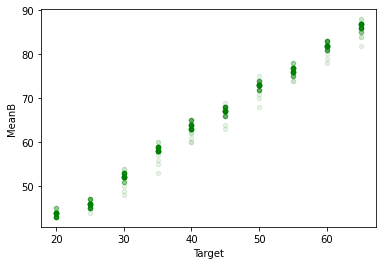

In [41]:
TofData.plot(kind="scatter", x= "Target",y= "MeanB",alpha = 0.1,color='green')

In [42]:
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [43]:
model = sklearn.linear_model.LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

Coefficients:  [[1.01949437]] 
Intercept: :  [26.32748675]


<AxesSubplot:xlabel='Target', ylabel='MeanB'>

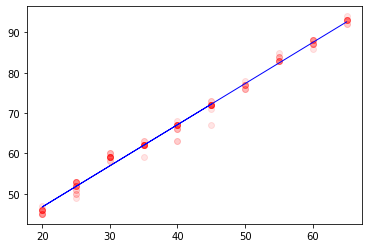

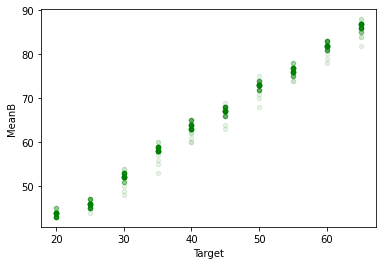

In [48]:
import matplotlib.pyplot as plt
print('Coefficients: ', model.coef_,'\nIntercept: : ',model.intercept_)
plt.scatter(X_test, y_test,  color='red',alpha = 0.1)
plt.plot(X_test, y_pred, color='blue', linewidth=1)
TofData.plot(kind="scatter", x= "Target",y= "MeanB",alpha = 0.1,color='green')